<a href="https://colab.research.google.com/github/RobertENasc/projetos_data_science/blob/main/1_Analisando_os_Dados_do_Airbnb_Grande_Manchester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Grande Manchester, Inglaterra

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à região Metropolitana de Manchester, e ver quais insights podem ser extraídos a partir de dados brutos.**


























































































































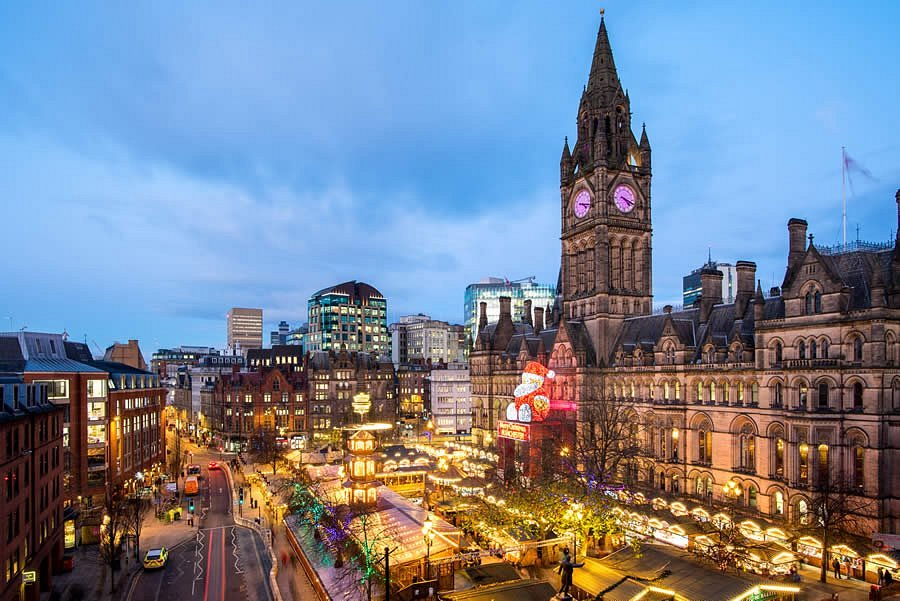

##Grande Manchester
Grande Manchester é uma região metropolitana no noroeste da Inglaterra, com uma população de 2.6 milhões de pessoas. Ela abrange uma das maiores áreas metropolitanas no Reino Unido e é composto por oito distritos metropolitanos e duas cidades: os distritos metropolitanos de Bolton, Bury, Oldham, Rochdale, Stockport, Tameside, Trafford, Wigan, e as cidades de Manchester e Salford.


## Obtenção dos Dados

Para esta análise exploratória inicial, será baixado apenas o arquivo csv:
* `listings.csv` - *Summary information and metrics for listings in Greater Manchester (good for visualisations)*.
Arquivo obtido a partir do site
[Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Vamos ao projeto.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/listings.csv")

## Análise dos Dados

Antes de iniciar qualquer análise, vamos verificar nosso *dataset* (conjunto de dados)visualizando  as 5 primeiras entradas e assim ter um entendimento de como os dados estão estruturados.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,553593935852510413,Double Ensuite with Shower at Pack Horse Inn,443206814,Mark,Stockport,Stockport District,53.37897,-2.00081,Private room,81,1,0,NaN,NaN,5,314,0,NaN
1,35032953,Cheshire Garden Apartment-Parking/Nr MAN Airport,24571277,Matthew,Stockport,Stockport District,53.33399,-2.20914,Entire home/apt,59,5,88,2022-06-09,2.48,1,293,23,NaN
2,628101015996224838,"Kinder View, Hay Barn Stay",39020740,Jenna,Stockport,Stockport District,53.38291,-2.00426,Entire home/apt,85,1,0,NaN,NaN,2,56,0,NaN
3,616555269384223014,Lovely detached house with 2 bedrooms for family,181347767,Jack,Stockport,Stockport District,53.35347,-2.21546,Private room,98,1,2,2022-05-31,1.76,3,78,2,NaN
4,30227447,"Floating Holidays, Narrowboat Columbina, Sleeps 6",141001541,Paul,Stockport,Stockport District,53.34621,-2.08427,Entire home/apt,317,3,1,2019-06-24,0.03,4,365,0,NaN


**Dicionário das variáveis**

Descrição de cada coluna do nosso *dataset* (conjunto de dados).

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - nome do grupo no qual o bairro pertence
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de avaliações nos últimos 12 meses 
* `license` - número de registro do imóvel

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna. Lembrando que este dataset (conjunto de dados) que baixamos é a versão "resumida" do Airbnb.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

Entradas:	4104
Variáveis:	18



In [5]:
# verificar o tipo das variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset* (conjunto de dados)?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* A variável `license`possui 100% dos seus valores ausentes. 
* As variáveis `reviews_per_month` e `last_review`têm menos de 20% dos valores ausentes.

Como não contém nenhuma informação, a variável `license`será excluída futuramente.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round (df.isnull().sum() / df.shape[0]*100,2).sort_values(ascending=False)

license                           100.00
reviews_per_month                  19.59
last_review                        19.59
name                                0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
id                                  0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
neighbourhood_group                 0.00
host_name                           0.00
host_id                             0.00
price                               0.00
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos usar um histograma, que é uma das principais ferramentas da estatística para extrair informações sobre frequência e distribuição dos dados.


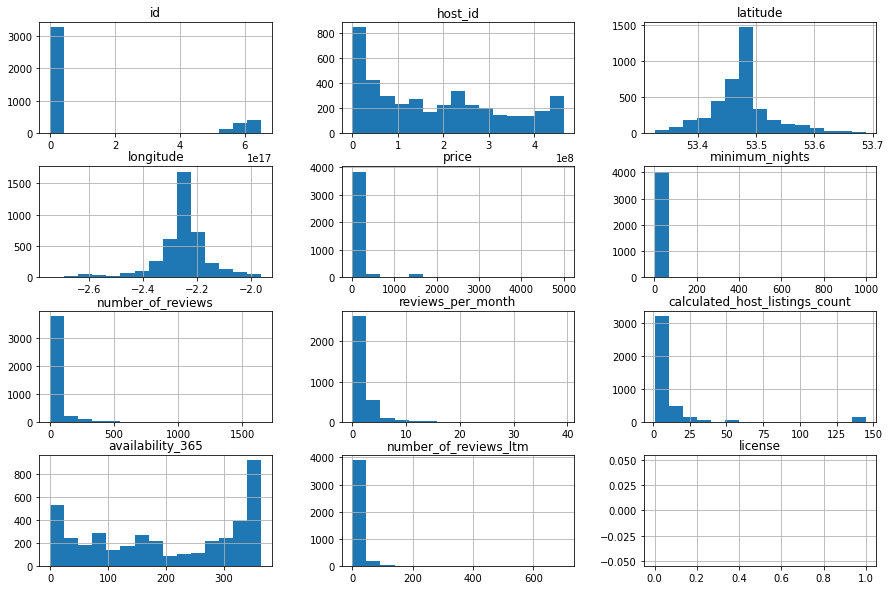

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**
Outliers são dados que se diferenciam drasticamente de todos os outros. Pela
distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`,(elas serão a base para nossa análise).
Para tratar os *outliers*, vamos usar:

* Resumo estatístico por meio do método `describe()`
* Fórmula:   IQR = Q3 - Q1 (Terceiro Quartil (75%) pelo Primeiro Quartil (25%)
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4104.000000,4104.000000,4104.000000,3300.000000,4104.000000,4104.000000
mean,153.942251,9.190302,32.416423,1.654879,11.129142,201.674708
std,279.737564,48.660689,66.320960,1.849543,27.104619,130.565150
min,11.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,48.000000,1.000000,1.000000,0.490000,1.000000,79.750000
50%,84.000000,2.000000,9.000000,1.090000,3.000000,197.500000
75%,136.000000,3.000000,35.000000,2.240000,9.000000,334.000000
max,5000.000000,999.000000,1651.000000,39.310000,145.000000,365.000000


**informações estatísticas relevantes:**
*   count - quantidade de entradas válida
*   mean - média dos valores
*   std - desvio padrão
*   min - menor valor da coluna
*   25% - percentil 25
*   50% - percentil 50 (e mediana)
*   75% - percentil 75
*   max - maior valor da coluna

#### Variável minimum_nights

In [9]:
# identificar o IQR para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('iqr minimum_nights: ', iqr_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights

print('Limite superior: ', sup_minimum_nights)
print('Limite inferior: ', inf_minimum_nights)

iqr minimum_nights:  2.0
Limite superior:  6.0
Limite inferior:  -2.0


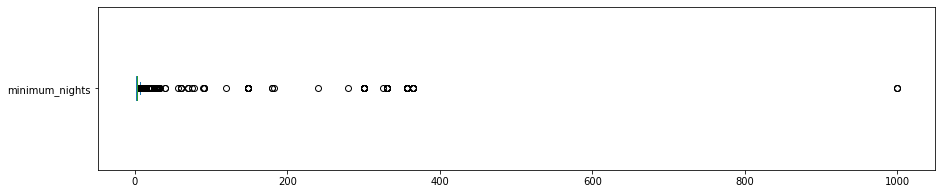


minimum_nights: valores acima de 6.0
470 entradas
11.45%


In [10]:
# Bloxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 6 para price
print("\nminimum_nights: valores acima de 6.0")
print("{} entradas".format(len(df[df.minimum_nights > 6.0])))
print("{:.2f}%".format((len(df[df.minimum_nights > 6.0]) / df.shape[0])*100))

#### Variável price

In [11]:
# identificando iqr da variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('iqr price: ', iqr_price)

# definir os limites superiores e inferiores                                      
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print('Limite superior: ', sup_price)
print('Limite inferior: ', inf_price)

iqr price:  88.0
Limite superior:  268.0
Limite inferior:  -84.0


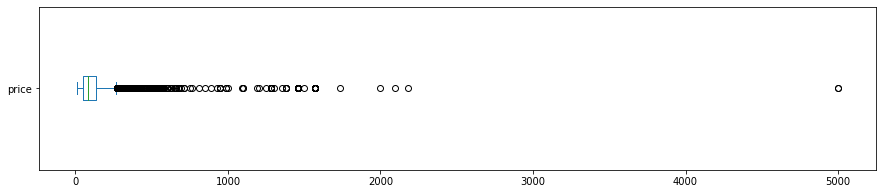


price: valores acima de 268
362 entradas
8.82%


In [12]:
# Bloxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 268 para price
print("\nprice: valores acima de 268")
print("{} entradas".format(len(df[df.price > 268])))
print("{:.2f}%".format((len(df[df.price > 268]) / df.shape[0])*100))

#### Histogramas sem *outliers*
Vamos fazer a limpeza dos *outliers* nas variáveis `price` e `minimum_nights`
 e excluir a variável `License`(já que não contém nenhuma informação),
depois plotar novamente o histograma.


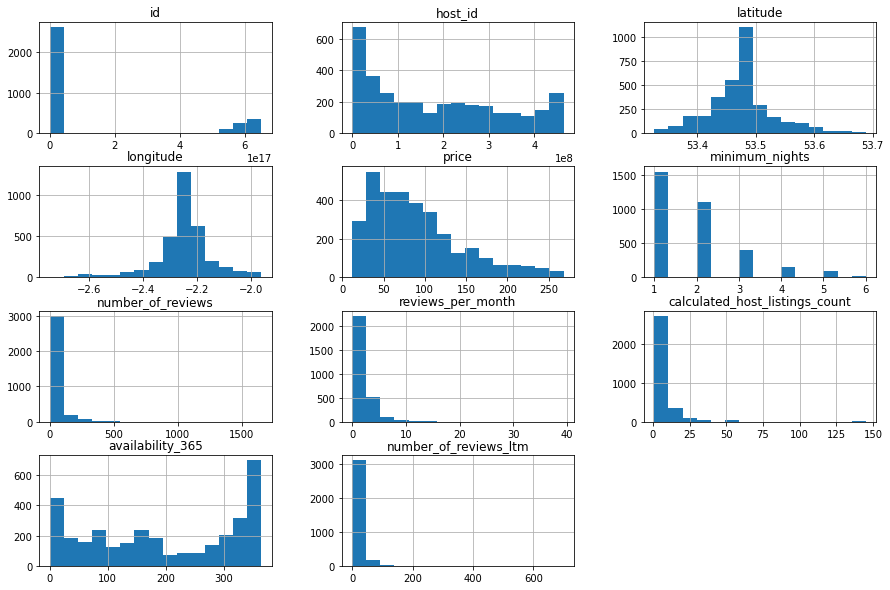

In [13]:
# remover os *outliers* em um novo DataFrame
df_nv = df.copy()
df_nv.drop(df_nv[df_nv.price > 268].index, axis=0, inplace=True)
df_nv.drop(df_nv[df_nv.minimum_nights> 6].index, axis=0, inplace=True)

# excluir coluna `license`,com dados ausentes
df_nv.drop(columns=['license'], axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_nv.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* (mapa de calor) a partir dessa matriz, usando a biblioteca `seaborn`

In [14]:
# criar uma matriz de correlação
corr = df_nv[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.028152,-0.098983,-0.006798,0.020875,0.064064
minimum_nights,0.028152,1.000000,-0.054638,-0.167482,-0.000806,-0.036816
number_of_reviews,-0.098983,-0.054638,1.000000,0.570832,-0.078394,-0.031332
reviews_per_month,-0.006798,-0.167482,0.570832,1.000000,-0.030146,0.031298
calculated_host_listings_count,0.020875,-0.000806,-0.078394,-0.030146,1.000000,0.110295
availability_365,0.064064,-0.036816,-0.031332,0.031298,0.110295,1.000000


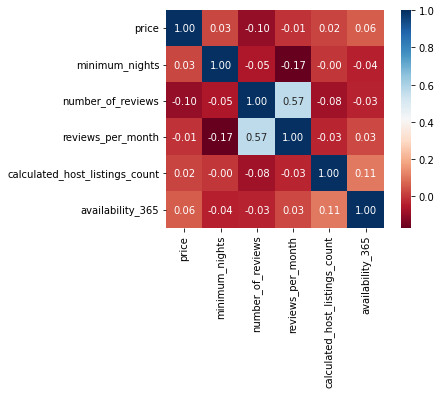

In [15]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual a média dos preços de aluguel?**


In [16]:
#média da coluna price
mean_price = (f'{df_nv.price.mean():.2f}')
print(f'O valor médio do aluguel é de {mean_price} Libras')

O valor médio do aluguel é de 90.03 Libras


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_nv.room_type.value_counts()


Entire home/apt    1958
Private room       1319
Shared room          29
Hotel room           11
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round (df_nv.room_type.value_counts() / df_nv.shape[0]*100,2)

Entire home/apt    59.03
Private room       39.76
Shared room         0.87
Hotel room          0.33
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

In [19]:
# ver preços por bairros, na média
round (df_nv.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

neighbourhood
City Centre            122.0
Bradford               113.0
Ancoats and Clayton    111.0
Withington             107.0
Crumpsall              107.0
Higher Blackley        102.0
Ardwick                101.0
Salford District        97.0
Longsight               97.0
Oldham District         96.0
Name: price, dtype: float64

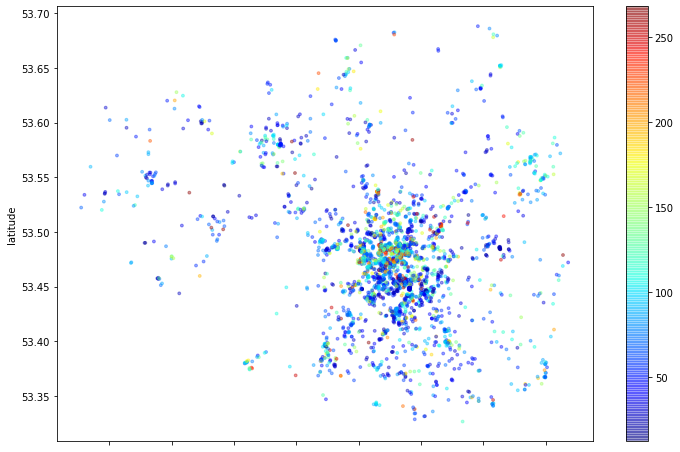

In [20]:
# plotar os imóveis pela latitude-longitude
df_nv.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_nv['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [21]:
# ver a média da coluna `minimum_nights``
mean_minimum_nights = (f'{df_nv.minimum_nights.mean():.2f}')
print(f'A média é de {mean_minimum_nights} noites')

A média é de 1.85 noites


## Conclusões

A análise de dados foi realizada com os dados do Airbnb da região Metropolitana de Manchester. Foi necessário excluir dados ausentes(coluna  `License`)  e fazer a limpeza dos *outliers* nas variáveis `price` e `minimum_nights`para obter um dataset mais próximo a realidade. Essa análise foi feita com uma base de dados resumida, acredito que atendeu o que foi proposto nesse projeto.




